In [29]:
import numpy as np
from matplotlib    import pyplot as plt
from numpy.random  import default_rng
from tqdm          import tqdm
from time          import perf_counter 
from scipy.stats   import pearsonr, poisson, wishart, multivariate_normal, norm, vonmises, multivariate_t, rice
from scipy.special import gamma, factorial, gammaln
from scipy.special import i0 as I0
# from dw_tools      import multivariatet as mvt

In [2]:
plt.rcParams.update({'font.size': 14})

**All the actionable content of this notebook is in sections 1, 2.1, 6.1, 7, and 8.**

## Joint probability distributions of $(E_1,E_2,E_3)$

Consider three normalized structure factors for related structures, $\left(E_1, E_2, E_3=E_{ref}\right)$ with joint probability density. In the (double) Wilson model,

$$
P\left(E_1,E_2,E_3\right) = P\left(E_{1x},E_{2x},E_{3x},E_{1y},E_{2y},E_{3y}\right)=N\left(0,C\right)
$$

(note the rearrangement of rows), with 

$$
C = \frac{1}{2}
\begin{bmatrix}
1   & r_x & r & 0   & 0   & 0  \\
r_x & 1   & r & 0   & 0   & 0  \\
r   & r   & 1 & 0   & 0   & 0  \\
0   & 0   & 0 & 1   & r_x & r  \\
0   & 0   & 0 & r_x & 1   & r  \\
0   & 0   & 0 & r   & r   & 1  
\end{bmatrix}
$$

## Conditional joint probability distribution of $(E_1, E_2)$ given $E_3$

### General considerations
Following https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Conditional_distributions, 

$$
P\left(E_1,E_2 | E_3\right) = P\left(E_{1x},E_{2x},E_{1y},E_{2x}|E_{3x}, E_{3y}\right)=N\left(r E_3,C_{1,2|3}\right)
$$

(note the rearrangement of rows), with conditional covariance matrix

$$
C_{1,2|3} = \frac{1}{2}
\begin{bmatrix}
1   -r^2 & r_x -r^2 & 0       & 0        \\
r_x -r^2 & 1   -r^2 & 0       & 0        \\
0        & 0        & 1  -r^2 & r_x -r^2 \\
0        & 0        & r_x-r^2 & 1 -r^2  
\end{bmatrix}
$$

Note that $r$ and $r_x$ cannot adopt arbitrary combinations of values. Specifically, the conditional covariance matrix is only positive definite if $1+r_x \geq 2r^2$. $E_1$ and $E_2$ are conditionally independent (and uncorrelated) when $r_x = r^2$. In that case, $1+r_x = 1+r^2 \geq 2r^2 $.

### Some detailed calculations

For parametrization of the joint distribution of $(E_1^2, E_2^2)$ conditional on $E_3$, we will need the covariance  

$$Cov\left( E_{1x}^2+E_{1y}^2, E_{2x}^2+E_{2y}^2 | E_3\right)=Cov\left( E_{1x}^2, E_{2x}^2|E_3\right)+Cov\left( E_{1x}^2, E_{2y}^2|E_3 \right)+Cov\left( E_{1y}^2, E_{2x}^2|E_3\right)+Cov\left(E_{1y}^2, E_{2y}^2|E_3\right)
$$

For each of these higher-order central moments, we can write 

$$
\begin{align}
Cov\left( E_{1x}^2, E_{2x}^2|E_3\right) = && 2 Cov^2\left(E_{1x},E_{2x}|E_3\right) &&+4\mu_{1x|3}\mu_{2x|3}Cov(E_{1x},E_{2x}|E_3) = && \frac{2}{4}(r_x-r^2)^2 +\frac{4}{2}\mu_{1x|3}\mu_{2x|3}(r_x-r^2)\\
Cov\left( E_{1x}^2, E_{2y}^2|E_3\right) = && 2 Cov^2\left(E_{1x},E_{2y}|E_3\right) &&+ 0= && 0 \\
Cov\left( E_{1y}^2, E_{2x}^2|E_3\right) = && 2 Cov^2\left(E_{1y},E_{2x}|E_3\right) &&+ 0= && 0 \\
Cov\left( E_{1y}^2, E_{2y}^2|E_3\right) = && 2 Cov^2\left(E_{1y},E_{2y}|E_3\right) &&+4\mu_{1y|3}\mu_{2y|3}Cov(E_{1y},E_{2y}|E_3) = && \frac{2}{4}(r_x-r^2)^2
                                                    +\frac{4}{2}\mu_{1y|3}\mu_{2y|3}(r_x-r^2)
\end{align}                                          
$$

To see this,

$$ Cov\left(E_{1x}^2,E_{2x}^2|E_3\right) = \left<\left(E_{1x}-\mu_{1x|3}+\mu_{1x|3}\right)^2
                                             \left(E_{2x}-\mu_{2x|3}+\mu_{2x|3}\right)^2
                                       |E_3\right> - 
                                       \left<\left(E_{1x}-\mu_{1x|3}+\mu_{1x|3}\right)^2 |E_3\right>
                                       \left<\left(E_{2x}-\mu_{2x|3}+\mu_{2x|3}\right)^2 |E_3\right>=\\
                                       \left<\left(E_{1x}-\mu_{1x|3}\right)^2
                                             \left(E_{2x}-\mu_{2x|3}\right)^2
                                       |E_3
                                       \right> +
                                       4\mu_{1x|3}\mu_{2x|3}Cov\left(E_{1x},E_{2x}|E_3\right)- 
                                       Var\left(E_{1x}|E_3\right)Var\left(E_{2x}|E_3\right) 
$$

after odd moments equal zero and terms like $\mu_{1x|3}^2 Var\left(E_{2x}|E_3\right)$ and $\mu_{1x|3}^2\mu_{2x|3}^2$ cancel out. In addition, we use that 

$$
                                       \left<\left(E_{1x}-\mu_{1x|3}\right)^2
                                             \left(E_{2x}-\mu_{2x|3}\right)^2
                                       |E_3
                                       \right> = Var\left(E_{1x}|E_3\right)Var\left(E_{2x}|E_3\right) + 
                                       2 \space Cov^2\left(E_{1x},E_{2x}|E_3\right)
$$
(validated)
with this last equality based on https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Higher_moments.

Hence, $$Cov\left( E_{1x}^2+E_{1y}^2, E_{2x}^2+E_{2y}^2 | E_3\right)=(r_x-r^2)^2+2(\mu_{ix|3}^2+\mu_{iy|3}^2)(r_x-r^2)$$

Likewise, based on the same equations,

$$Var\left( E_{1x}^2+E_{1y}^2| E_3\right)=
  Var\left( E_{1x}^2| E_3\right)+Var\left( E_{1y}^2| E_3\right)=\\
  2 Var^2\left(E_{1x}|E_3\right)+2 Var^2\left(E_{1y}|E_3\right)+
  4\mu_{1x|3}^2 Var(E_{1x}|E_3)+4\mu_{1y|3}^2 Var(E_{1y}|E_3)=\\
  2 \frac{1}{4}(1-r^2)^2 + 2 \frac{1}{4}(1-r^2)^2 + 4\mu_{1x|3}^2 (1-r^2)/2 + 4\mu_{1y|3}^2 (1-r^2)/2=\\
  (1-r^2)^2 + 2(\mu_{1x|3}^2 + \mu_{1y|3}^2)(1-r^2)
  $$

Now

$$
\rho\left( E_{1x}^2+E_{1y}^2, E_{2x}^2+E_{2y}^2 | E_3\right) = \frac{(r_x-r^2)^2+2(\mu_{ix|3}^2+\mu_{iy|3}^2)(r_x-r^2)}{(1-r^2)^2 + 2(\mu_{1x|3}^2 + \mu_{1y|3}^2)(1-r^2)}
$$

Implementing this last equation:

In [3]:
def rho_x2y2(r,rx,mu):
    return ((rx-r**2)**2+2*np.sum(mu**2)*(rx-r**2))/((1-r**2)**2+2*np.sum(mu**2)*(1-r**2))
print(rho_x2y2(0.8,0.9,np.array([1,0])))

0.6916195856873824


For use of the bivariate Rice distribution below, we will also want to know 

$$
\begin{align}
\rho\left(E_1,E_2|E_3\right) & = \frac{\mathbb{E}(E_1 E_2^*)-\mathbb{E}(E_1)\mathbb{E}(E_2^*)}
                                    {\sqrt{Var(E_1)Var(E_2)}} \\
                             & = \frac{\mathbb{E}\left((E_1-\mu_{1|3}+\mu_{1|3}) (E_2-\mu_{2|3}+\mu_{2|3})^*\right)
                                       -\mathbb{E}(E_1)\mathbb{E}(E_2^*)}
                                    {\sqrt{Var(E_1)Var(E_2)}} \\
                             & = \frac{Cov(E_1, E_2^*)+\mu\mu^*-\mu\mu^*}
                                    {\sqrt{Var(E_1)Var(E_2)}} \\
                             & = \frac{Cov(E_{1x}, E_{2x}) + Cov(E_{1y}, E_{2y})+0}{\sqrt{Var(E_1)Var(E_2)}} \\
                             & = \frac{r_x-r^2}{1-r^2}
\end{align}
$$

with the variances analogously defined as $Var(E_1)=\mathbb{E}(E_1 E_1^*)-\mathbb{E}(E_1)\mathbb{E}(E_1^*)$, etc.

In [4]:
def rho_xy(r,rx):
    return (rx-r**2)/(1-r**2)
print(rho_xy(0.8,0.9))

0.7222222222222222


Numerical check:

In [5]:
rng = default_rng()
r   = 0.7
rx  = 0.9
mean= np.asarray([1.5,1.5,0,0])
cov = 0.5*\
    np.asarray([[ 1-r**2, rx-r**2,0,      0      ],\
                [rx-r**2,  1-r**2,0,      0      ],\
                [0,        0,     1-r**2, rx-r**2],\
                [0,        0,    rx-r**2,  1-r**2]])
vals = rng.multivariate_normal(mean,cov,1000000)

x=np.sqrt(vals[:,0]**2 + vals[:,2]**2)
y=np.sqrt(vals[:,1]**2 + vals[:,3]**2)
print(f"expected rho(x2,y2): {rho_x2y2(r,rx,np.array(mean[[0,2]]))}")
print(f"observed rho(x2,y2): {pearsonr(x**2,y**2)[0]}")

cov_1_2 = np.cov(vals[:,0],vals[:,1]) + np.cov(vals[:,2],vals[:,3])
var_1_1 = np.var(vals[:,0]) + np.var(vals[:,2])
var_2_2 = np.var(vals[:,1]) + np.var(vals[:,3])
print(f"expected rho(x, y):  {rho_xy(r,rx)}")
print(f"observed rho(x, y):  {cov_1_2[0,1]/np.sqrt(var_1_1*var_2_2)}") #I should improve the variable names

expected rho(x2,y2): 0.7878752299322925
observed rho(x2,y2): 0.787725338173319
expected rho(x, y):  0.8039215686274511
observed rho(x, y):  0.8034292126550616


## Bivariate non-central $\chi^2$ distribution (does not 'work' yet)
Now, we try to see if we can get the bivariate non-central $\chi^2$ distribution (BNC) to work!

In [6]:
rng = default_rng()
# r   = 0.7
# rx  = 0.9
# mean= np.asarray([1.5,1.5,0,0])
cov = 0.5*\
    np.asarray([[ 1-r**2, rx-r**2,0,      0      ],\
                [rx-r**2,  1-r**2,0,      0      ],\
                [0,        0,     1-r**2, rx-r**2],\
                [0,        0,    rx-r**2,  1-r**2]])
vals = rng.multivariate_normal(mean,cov,1000000)
x=vals[:,0]**2 + vals[:,2]**2
y=vals[:,1]**2 + vals[:,3]**2

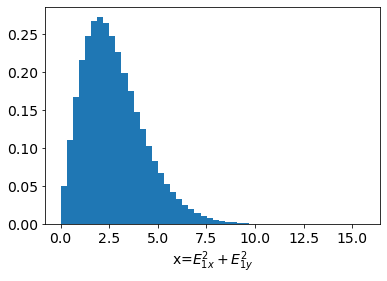

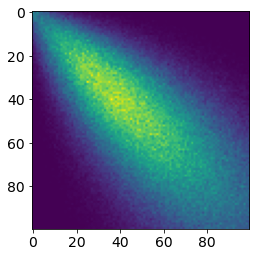

In [7]:
plt.hist(x,density=True,bins=50)
plt.xlabel(r"x=$E_{1x}^2+E_{1y}^2$")
plt.show()

xedges = np.linspace(0,4,101)
yedges = np.linspace(0,4,101)
Hx_emp, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges),density=True)
plt.imshow(Hx_emp)
plt.show()

The following expression for the joint PDF of the bivariate non-central $\chi^2$ distribution is based on https://www.researchgate.net/publication/220557408. Note that $\rho$ is defined in two ways prior to eq. (3.8). These two ways are inconsistent.

In [8]:
# a naive for loop over this is somehow faster!
def SymmBivariateNoncentralChi_pdf(y, m, rho, theta, nmax):
    (y1,y2)=y
    mdiv2 = m/2
    thdiv2 = theta/2
    (j_max,lam1_max, lam2_max) = (nmax,nmax,nmax)
    BNC_terms = np.zeros((j_max,lam1_max, lam2_max))
    j,lam1,lam2 = np.meshgrid(range(j_max),range(lam1_max),range(lam2_max))
    BNC_terms =  (1-rho**2)**mdiv2 * rho**(2*j)/gamma(mdiv2) *\
                  np.exp(gammaln(mdiv2+j)-gammaln(mdiv2+j+lam1)-gammaln(mdiv2+j+lam2)-gammaln(j+1))*\
                  (y1/(2*(1-rho**2)))**(mdiv2+j+lam1)*np.exp(-y1/(2*(1-rho**2)))/y1 *\
                  (y2/(2*(1-rho**2)))**(mdiv2+j+lam2)*np.exp(-y2/(2*(1-rho**2)))/y2 *\
                  poisson.pmf(lam1, thdiv2) * poisson.pmf(lam2, thdiv2)
    return np.sum(BNC_terms[:])

def SymmBivariateNoncentralChiAll_pdf(y, m, rho, theta, nmax):
    ny = y.shape[0]
    mdiv2 = m/2
    thdiv2 = theta/2
    (j_max,lam1_max, lam2_max) = (nmax,nmax,nmax)
    BNC_terms = np.zeros((j_max,lam1_max, lam2_max,ny))
    j,lam1,lam2,ydum = np.meshgrid(range(j_max),range(lam1_max),range(lam2_max),range(ny))
    
    y1 = np.broadcast_to(y[:,0],(nmax,nmax,nmax,ny))
    y2 = np.broadcast_to(y[:,1],(nmax,nmax,nmax,ny))
    BNC_terms =  (1-rho**2)**mdiv2 * rho**(2*j)/gamma(mdiv2) *\
                  np.exp(gammaln(mdiv2+j)-gammaln(mdiv2+j+lam1)-gammaln(mdiv2+j+lam2)-gammaln(j+1))*\
                  (y1/(2*(1-rho**2)))**(mdiv2+j+lam1)*np.exp(-y1/(2*(1-rho**2)))/y1 *\
                  (y2/(2*(1-rho**2)))**(mdiv2+j+lam2)*np.exp(-y2/(2*(1-rho**2)))/y2 *\
                  poisson.pmf(lam1, thdiv2) * poisson.pmf(lam2, thdiv2)
    return np.sum(BNC_terms,axis=(0,1,2))

In [9]:
theta_test = 4
print(SymmBivariateNoncentralChiAll_pdf(np.transpose(np.array([[0.11,0.21,0.31],[0.12,0.22,0.32]])), m=2, rho=0.95, \
                                                     theta=theta_test, nmax=int(np.ceil(theta_test+3*np.sqrt(theta_test)))))
print(SymmBivariateNoncentralChi_pdf((0.11,0.12), m=2, rho=0.95, \
                                                     theta=theta_test, nmax=int(np.ceil(theta_test+3*np.sqrt(theta_test)))))

[0.10991548 0.16216877 0.20146008]
0.10991547627938417


In [10]:
nx, ny = (100,100)
xbase  = np.linspace(0.001, 4, nx)
ybase  = np.linspace(0.001, 4, ny)
xx,yy  = np.meshgrid(xbase,ybase)
y_in   = np.transpose(np.array([xx.flatten(), yy.flatten()]))
print(y_in.shape)

rho    = rho_xy(r,rx)
theta  = mean[0]**2+mean[2]**2
t1_start = perf_counter()  
result = SymmBivariateNoncentralChiAll_pdf(y_in, m=2, rho=rho, theta=theta, nmax=int(np.ceil(theta+3*np.sqrt(theta))))
t1_end = perf_counter()  

print(f"Elapsed time: {t1_end-t1_start:.3} s")
print(f"Integrated probability density: {np.sum(result[:])*(0.04)**2:.3}")

(10000, 2)
Elapsed time: 1.76 s
Integrated probability density: 0.643


In [11]:
nx, ny = (100,100)
xbase  = np.linspace(0.001, 4, nx)
ybase  = np.linspace(0.001, 4, ny)
xx,yy  = np.meshgrid(xbase,ybase)
y_in   = np.transpose(np.array([xx.flatten(), yy.flatten()]))
print(y_in.shape)

rho    = rho_xy(r,rx)
theta  = mean[0]**2+mean[2]**2
t1_start = perf_counter()  
result = SymmBivariateNoncentralChiAll_pdf(y_in, m=2, rho=rho, theta=theta, nmax=int(np.ceil(theta+3*np.sqrt(theta))))
t1_end = perf_counter()  

print(f"Elapsed time: {t1_end-t1_start:.3} s")
print(f"Integrated probability density: {np.sum(result)*(0.04**2):.3}")

(10000, 2)
Elapsed time: 1.73 s
Integrated probability density: 0.643


In [12]:
nx, ny = (100,100)
xbase  = np.linspace(0.001, 4, nx)
ybase  = np.linspace(0.001, 4, ny)
result = np.zeros((nx,ny))

# rho=0.9393
# theta = 8.431
print(f"rho: {rho}")
print(f"theta: {theta}")
t2_start = perf_counter() 
for i in tqdm(range(nx)):
    for j in range(ny):
        result[i,j] = SymmBivariateNoncentralChi_pdf((xbase[i],ybase[j]), m=2, rho=rho, \
                                                     theta=theta, nmax=int(np.ceil(theta+3*np.sqrt(theta))))
t2_end = perf_counter()  
print(f"Elapsed time: {t2_end-t2_start:.3} s")
sum_sq_residual = np.sum((Hx_emp[:]-result[:])**2)
print(f"Sum of squared residuals: {sum_sq_residual:.4}")

  2%|▊                                         | 2/100 [00:00<00:05, 19.47it/s]

rho: 0.8039215686274511
theta: 2.25


100%|████████████████████████████████████████| 100/100 [00:04<00:00, 21.21it/s]

Elapsed time: 4.74 s
Sum of squared residuals: 29.22


In [15]:
def bnc_residual(p,Hx_emp):
    rho    = (2/np.pi)*np.arctan(p[0])
    theta  = np.exp(p[1])
    print(f"rho: {rho:.5}, theta: {theta:.4}")
#     nx, ny = (50,50)
    xbase  = np.linspace(0.001, 4, nx)
    ybase  = np.linspace(0.001, 4, ny)
    result = np.zeros((nx,ny))
    for i in range(nx):
        for j in range(ny):
            result[i,j] = SymmBivariateNoncentralChi_pdf((xbase[i],ybase[j]), m=2, rho=rho, \
                                                     theta=theta, nmax=int(np.ceil(theta+3*np.sqrt(theta))))
    sum_sq_residual = 100*np.sum((Hx_emp[:]-result[:])**2)
    return sum_sq_residual

In [17]:
p_old = np.array([20,0.2])
E_old = bnc_residual(p_old,Hx_emp)
nmax=0
for i in range(nmax):
    dp = np.random.normal(0,1,p_old.shape)
    p_new = p_old + np.array([0.3*dp[0],0.001*dp[1]])
    E_new = bnc_residual(np.array([p_new[0],p_new[0]*p_new[1]]),Hx_emp)
#     print(E_new)
#     print(Hz.shape)
    if np.random.rand()<np.exp(-(E_new-E_old)):
        E_old=E_new
        p_old=p_new
#         print(f"p=({p_old}), E={E_old}")
    print(f"p=({p_old}), E={E_old}")
print(f"p=({p_old}), E={E_old}")

rho: 0.9682, theta: 1.221
p=([20.   0.2]), E=10363.91685361099


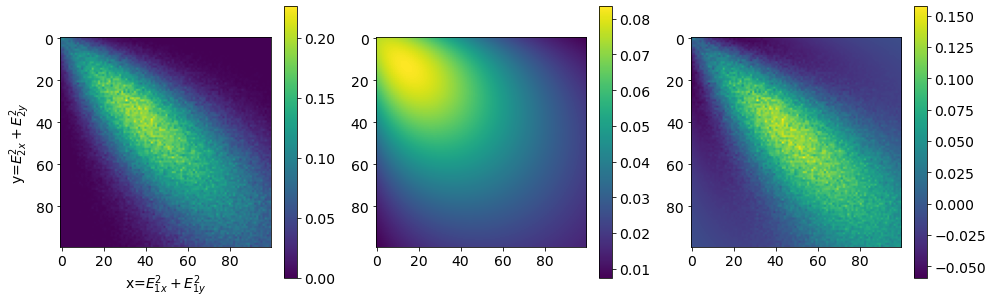

In [18]:
xedges = np.linspace(0,4,101)
yedges = np.linspace(0,4,101)
Hx_emp, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges),density=True)
                                    
plt.figure(figsize=(16,5))                         
plt.subplot(1,3,1)        
plt.imshow(Hx_emp)
plt.xlabel(r"x=$E_{1x}^2+E_{1y}^2$"); plt.ylabel(r"y=$E_{2x}^2+E_{2y}^2$")
plt.colorbar(); 

plt.subplot(1,3,2)        
plt.imshow(result)
plt.colorbar()
                         
plt.subplot(1,3,3)
plt.imshow(Hx_emp-result)
plt.colorbar(); plt.show()

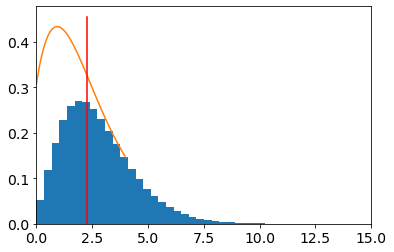

In [19]:
plt.hist(x,density=True,bins=50)
plt.plot(xbase,0.08*np.nansum(result,axis=0))
plt.plot(theta*np.array([1,1]), plt.ylim(),'r-')
plt.xlim((0,15))
plt.show()

In [20]:
plt.imshow(result_10-result_5)
plt.colorbar()
plt.show()

plt.imshow(result_20-result_10)
plt.colorbar()
plt.show()

NameError: name 'result_10' is not defined

## Fitting the Wishart distribution does not work well...

In [21]:
xedges = np.linspace(0,4,20)
yedges = np.linspace(0,4,20)
Hx, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))

def wishart_residual(p,Hx, xedges, yedges):
    (a,b,c)=(p[0],p[1],p[2])
    z = wishart.rvs(df=2+np.exp(a),scale=np.array([[1,(2/np.pi)*np.arctan(b)],[(2/np.pi)*np.arctan(b),1]]),size=10000)
    Hz, xedges, yedges = np.histogram2d(z[:,0,0]/c, z[:,1,1]/c, bins=(xedges, yedges))
    return np.sum((np.log(3+Hz[:])-np.log(3+Hx[:]))**2), Hz

p_old = np.array([3,1000,10])
E_old, Hz = wishart_residual(p_old,Hx, xedges, yedges)
nmax=500
for i in tqdm(range(nmax)):
    dp = np.random.normal(0,1,p_old.shape)
    p_new = p_old + np.array([0.05*dp[0],20*dp[1],dp[2]])
    E_new, Hz = wishart_residual(p_new,Hx, xedges, yedges)
#     print(E_new)
#     print(Hz.shape)
    if np.random.rand()<np.exp(-(E_new-E_old)):
        E_old=E_new
        p_old=p_new
#         print(f"p=({p_old}), E={E_old}")
    if i%100==0:
        print(f"p=({p_old}), E={E_old}")
print(f"p=({p_old}), E={E_old}")

  1%|▎                                         | 3/500 [00:00<00:20, 24.55it/s]

p=([  2.92409825 991.85258157   9.50326241]), E=10779.674342153854


 21%|████████▍                               | 105/500 [00:04<00:17, 23.02it/s]

p=([  2.34604243 981.79882473   5.72411511]), E=10589.967779197383


 25%|█████████▊                              | 123/500 [00:05<00:16, 23.33it/s]


KeyboardInterrupt: 

## Attempts at direct numerical integration of the multivariate normal

### Example numerical integration in 1D

In [22]:
deg = 400 #Degree of underlying polynomial approximation
grid, weights = np.polynomial.chebyshev.chebgauss(deg)

def f(p):
    return np.sin(x)**2 # * np.sin(y)**2.

a = 0.
b = 2.*np.pi

#Change of interval
x = (b-a)*grid/2. + (a+b)/2.
prefactor = (b-a)/2.

#Reweight for general functional form
#Each flavor of gauss quadrature has a different
#formula for this
w = weights*np.sqrt(1-grid**2.)


print(f"int of f(x) from {a} to {b}  = {prefactor*w@f(x)}")
print(f"pi:                                          {np.pi}")

int of f(x) from 0.0 to 6.283185307179586  = 3.1415926535898073
pi:                                          3.141592653589793


In [23]:
from scipy.stats import multivariate_normal
def Norm2D_polar(phi1,phi2,R1,R2,mean_xy,cov_xy):
    x = [R1*np.cos(phi1), R1*np.sin(phi1), R2*np.cos(phi2),R2*np.sin(phi2)]
    return R1*R2*multivariate_normal.pdf(x,mean_xy,cov_xy)

R1 = 0.5
R2 = 0.7
r  = 0.9
rx = 0.99
mean_xy = np.array([0,0,0,0])
cov_xy = 0.5*np.array([[1-r**2,  0,      rx-r**2,0      ],\
                       [0,       1-r**2, 0,      rx-r**2],\
                       [rx-r**2, 0    ,  1-r**2, 0      ],\
                       [0,       rx-r**2,0,      1-r**2 ]])

In [24]:
from scipy import integrate

t3_start = perf_counter()  
tmp=integrate.dblquad(Norm2D_polar,0,2*np.pi,lambda x: 0, lambda x: 2*np.pi, args=(R1,R2,mean_xy,cov_xy))
t3_end = perf_counter()  
print(tmp[0])
print(f"Elapsed time: {t3_end-t3_start:.3} s")

t3_start = perf_counter()  
tmp=integrate.dblquad(Norm2D_polar,0,2*np.pi,lambda x: 0, lambda x: np.pi, args=(R1,R2,mean_xy,cov_xy))
t3_end = perf_counter()  
print(2*tmp[0])
print(f"Elapsed time: {t3_end-t3_start:.3} s")


0.5019583812217697
Elapsed time: 0.451 s
0.5019583812217694
Elapsed time: 0.217 s


## Bivariate rician (Abu-Dayya & Beaulieu; Beaulieu & Hemachandra)

Consider, again, a pair of variables $\left(E_1, E_{3}\right)$, with $E_1=(E_{1x}, E_{1y})$, and $E_{3}=(E_{3x}, E_{3y})$ jointly normal, $\sim N\left((0,0,0,0),C\right)$, with 

$$
C = 
\frac{\Sigma}{2}
\begin{bmatrix}
1 & 0 & r & 0 \\
0 & 1 & 0 & r \\
r & 0 & 1 & 0 \\
0 & r & 0 & 1  
\end{bmatrix}
$$

The notation is such that $\left<|E_1|^2\right>=\left<E_{1x}^2+E_{1y}^2\right>=\Sigma$. For actual normalized structure factors, rather than $F$'s, $\Sigma=1$.

Now, when we have a known value for $E_3=(E_{3,x}, E_{3,y})$, the conditional distribution of $E$ becomes a bivariate normal with mean $\mu = r * E_{3}$, with $r$ playing the role of $r_{DW}$ in the double-wilson model, and covariance matrix 

$$C_{1|3} = \frac{\Sigma}{2}
\begin{bmatrix}
1-r^2 & 0 \\
0 & 1-r^2
\end{bmatrix}
$$

It is helpful to write this in polar coordinates using $E_1 = R_1 \left(\cos(\phi_1),\sin(\phi_1)\right)$ and $\mu = r E_3 = R_3 \left(\cos(\phi_3),\sin(\phi_3)\right)$, such that

$$
\begin{align}
P\left(R_1,\phi_1 | R_3, \phi_3\right) & =  R_1 \frac{1}{2 \pi \sqrt{\det(C_{1|3})}} * 
                                       \exp\left(
                                           -\frac{1}{2}
                                           \left(R_1\cos(\phi_1)-R_3\cos(\phi_3), 
                                                 R_1\sin(\phi_1)-R_3\sin(\phi_3)
                                           \right)
                                           C_{1|3}^{-1}
                                           \left(R_1\cos(\phi_1)-R_3\cos(\phi_3), 
                                                 R_1\sin(\phi_1)-R_3\sin(\phi_3)
                                           \right)^T
                                       \right)\\
                                       & = 
                                       R_1 \frac{1}{2 \pi \sqrt{\det(C_{1|3})}} * 
                                       \exp\left(
                                           -\frac{R_1^2 + R_3^2}{\Sigma(1-r^2)}
                                           +\frac{R_1 R_3 (\cos(\phi_1)\cos(\phi_3)-
                                                                      \sin(\phi_1)\sin(\phi_3))}
                                                            {\Sigma(1-r^2)}          
                                           \right) \\
                                       & = 
                                        \frac{R_1}{\pi \Sigma (1-r^2)}  
                                       \exp\left(
                                           -\frac{R_1^2 + R_3^2}{\Sigma(1-r^2)}
                                           +\frac{R_1 R_3 \cos(\phi_1-\phi_3)}{\Sigma(1-r^2)}          
                                           \right)
\end{align}                                           
$$

where we use that $C_{1|3}^{-1} = \frac{2}{\Sigma} \frac{1}{1-r^2}$ and $\det(C_{1|3}) = \left(\frac{\Sigma}{2}(1-r^2)\right)^2$.

We can marginalize over $\Delta\phi = \phi_1-\phi_3$,

$$
\begin{align}
P\left(R_1 | R_3\right) & = \int_{0}^{2\pi} d\Delta\phi
                                 \frac{R_1}{\pi \Sigma (1-r^2)} * 
                                 \exp\left(
                                     -\frac{R_1^2 + R_3^2}{\Sigma(1-r^2)}
                                     +\frac{R_1 R_3 \cos(\Delta\phi)}{\Sigma(1-r^2)}          
                                 \right) \\
                        & = \frac{2 R_1}{\Sigma (1-r^2)} 
                                 \exp\left(
                                     -\frac{R_1^2 + R_3^2}{\Sigma(1-r^2)}
                                 \right)
                            I_0\left(
                                \frac{2 R_1 R_3}{\Sigma(1-r^2)}          
                            \right)
\end{align}                                           
$$

which is the Rice distribution. For comparison to Bricogne (1999), his $R_B$ is our $R_1$, his $r_B$ is our $R_3=r|E_3|$, and his $\Sigma_B$ is $\frac{\Sigma}{2}(1-r^2)$, our per-term conditional variance (I added the $B$ subscripts to indicate "Bricogne").

### Abu-Dayya & Beaulieu, "Switched Diversity in Microcellular Ricean Channels"

The Rice distribution is of interest in the wireless communication literature. The equation above maps to the "Ricean PDF" in eq. 1 of Abu-Dayya and Beaulieu (1994), with $K = R_3^2/\Sigma(1-r^2)$ in our terms, or $R^2/\Sigma$ in Bricogne (1999), eq. 1.6's, and $\frac{1+K}{\beta}=2/\Sigma(1-r^2)$ in our terms, or $1/\Sigma_B$ in Bricogne's. In this formalism,

$$P\left(R_1\right|E_3) = \frac{R_1(1+K)}{\beta}\exp\left(-K-\frac{(1+K)R_1^2}{2\beta}\right)\times 
                                            I_0\left(2R_1\sqrt{\frac{K(1+K)}{2\beta}}\right)
$$                                            

This formalism is worth studying, because Abu-Dayya and Beaulieu derive a bivariate Rice distribution, with

$$
\begin{align}
P\left(R_1,R_2\right) = & \frac{(1+K)^2 R_1 R_2}{2\pi \beta^2(1-v^2)}
                        \exp\left(
                            \frac{-2K}{1+v} - \frac{(1+K)(R_1^2+R_2^2)}{2(1-v^2)\beta}
                        \right) \\ 
                        & \times
                        \int_{0}^{2\pi} \exp\left(
                            \frac{v(1+K)R_1 R_2 \cos \theta}{(1-v^2)\beta}
                        \right) \\
                        & \times I_0\left(
                            \sqrt{\frac{2K(1+K)(R_1^2 + R_2^2+2R_1R_2\cos\theta}{\beta(1+v)^2}}
                        \right) d\theta
\end{align}
$$

with 

$$
v = \frac{\left<\left(E_1^* - \left<E_1^*\right>\right)\left(E_2 - \left<E_2\right>\right)\right>}
         {\sqrt{
             \left<\left|E_1 - \left<E_1\right>\right|^2\right>
             \left<\left|E_2 - \left<E_2\right>\right|^2\right>       
              }}
$$

For the case of the pdf of $E_1$ and $E_2$ conditional on $E_3$, we derive and validate an expression for $v$ above, namely

$$
v=\frac{r_x-r^2}{1-r^2}
$$

Note that the expression for $v$ is equivalent to the expression for $\rho_{k,j}=\lambda_k \lambda_j$ in Beaulieu & Hemachandra (2011).

In [56]:
rng = default_rng()
r   = 0.7
rx  = 0.9
mean= np.asarray([0.5,0.5,0,0]) # this is the conditional mean already!!
cov = 0.5*\
    np.asarray([[ 1-r**2, rx-r**2,0,      0      ],\
                [rx-r**2,  1-r**2,0,      0      ],\
                [0,        0,     1-r**2, rx-r**2],\
                [0,        0,    rx-r**2,  1-r**2]])
vals = rng.multivariate_normal(mean,cov,10000000)
R1_sq=vals[:,0]**2 + vals[:,2]**2
R2_sq=vals[:,1]**2 + vals[:,3]**2


Implementing eq. 15 of Abu-Dayya and Beaulieu:

In [9]:
deg = 100 #Degree of underlying polynomial approximation
grid, weights = np.polynomial.chebyshev.chebgauss(deg)

def f(theta, R1, R2, K, p1, v):
#   p1 = (1+K)/beta # beta only every appears as (1+K)/beta
    p2 = (1-v**2)
    prefactor_1 = p1**2 * R1 * R2/(2*np.pi*p2)
    pref2_int_1 = np.exp(-2*K/(1+v) - (p1*(R1**2 + R2**2))/(2*p2)+\
                          v*p1*R1*R2*np.cos(theta)/p2) # this is more stable
    integrand_2 = I0(np.sqrt((2*K*p1*(R1**2 + R2**2 + 2*R1*R2*np.cos(theta))))/(1+v))
    return prefactor_1*pref2_int_1*integrand_2

a = 0.
b = 2.*np.pi

#Change of interval
x = (b-a)*grid/2. + (a+b)/2.
prefactor = (b-a)/2.

#Reweight for general functional form
#Each flavor of gauss quadrature has a different
#formula for this
w = weights*np.sqrt(1-grid**2.)

R1 = 1
R2 = 1
K  = float((mean[0]**2 + mean[2]**2)/(1-r**2))
p1 = 2/(1-r**2)
v  = (rx-r**2)/(1-r**2)
# print(w.shape)

print(f"int of f(x) from {a} to {b}  = {prefactor*w@f(x, R1,R2,K,p1,v)}")


int of f(x) from 0.0 to 6.283185307179586  = 0.9827185245608082


In [10]:
nx, ny = (200,200)
xy_max = 6
xbase  = np.linspace(0.001, xy_max, nx)
ybase  = np.linspace(0.001, xy_max, ny)
xx,yy  = np.meshgrid(xbase,ybase)
y_in   = np.transpose(np.array([xx.flatten(), yy.flatten()]))
print(y_in.shape)

t1_start = perf_counter()  
result = np.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        result[i,j] = prefactor*w@f(x, xbase[i],ybase[j],K,p1,v)
t1_end = perf_counter()  

print(f"Elapsed time: {t1_end-t1_start:.3} s")
print(f"Integrated probability density: {np.sum(result[:])*((xy_max/nx)*(xy_max/ny)):.3}")

(40000, 2)
Elapsed time: 1.01 s
Integrated probability density: 0.99


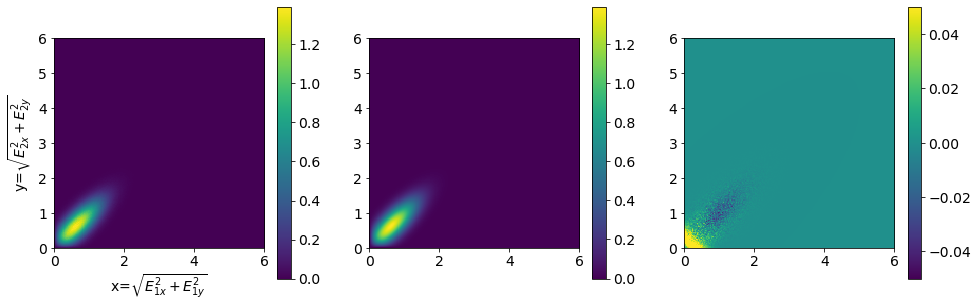

In [11]:
(xmax,ymax) = (xy_max,xy_max)
xedges = np.linspace(0,xmax,nx+1)
yedges = np.linspace(0,ymax,ny+1)
Hx_emp, xedges, yedges = np.histogram2d(np.sqrt(R1_sq), np.sqrt(R2_sq), bins=(xedges, yedges),density=True)

plt.figure(figsize=(16,5))                         
plt.subplot(1,3,1)        
plt.imshow(Hx_emp, interpolation='none', extent=[0,xmax,0,ymax],origin='lower')
plt.xlabel(r"x=$\sqrt{E_{1x}^2+E_{1y}^2}$"); plt.ylabel(r"y=$\sqrt{E_{2x}^2+E_{2y}^2}$")
plt.colorbar(); 

plt.subplot(1,3,2)        
plt.imshow(result, interpolation='none', extent=[0,xmax,0,ymax],origin='lower')
plt.colorbar()
                         
plt.subplot(1,3,3)
plt.imshow(Hx_emp-result, interpolation='none', extent=[0,xmax,0,ymax],origin='lower',vmin=-0.05,vmax=0.05)
plt.colorbar(); plt.show()

A look at asymptotic normal approximations

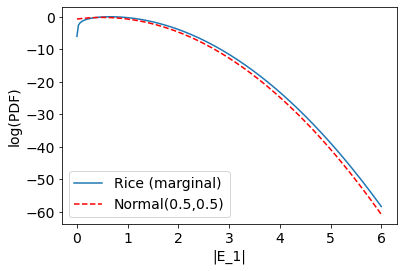

In [29]:
plt.plot(xbase,np.log((6/200)*np.sum(result,axis=0)),label="Rice (marginal)")
loc=np.sqrt(np.sum(mean[[0,2]]**2))

plt.plot(xbase,np.log(norm.pdf(xbase,loc=loc, scale=0.5)),'r--',label="Normal(0.5,0.5)")
plt.ylabel("log(PDF)")
plt.xlabel("|E_1|")
plt.legend()
plt.show()

### Beaulieu & Norman, "Novel Representations for the Bivariate Rician Distribution"

**I have not yet correctly parametrized this.** Key is to realize that for the general case in which $E_1$ and $E_2$ have a non-zero correlation $r_x-r^2\neq0$ after conditioning on a third structure factor, $E_3$, we need to incorporate in the equivalent of eq. 1 of Beaulieu and Norman an extra dependent component between $E_1$ and $E_2$, e.g. $E_{12}$ to get to the right value of $r_x-r^2$. In addition, the relevant values of $\lambda_k$ and $\sigma_k$ will be affected as the dependent term behaves differently from the naive conditional distribution of either $E_1$ or $E_2$ given $E_3$.

The great thing about the formalism is that, in principle, it also allows for different reference structure factors for $E_1$ and $E_2$, as may be relevant when inferring $E_{on}$ and $E_{off}$. 

When I revisit this, I should start with detailed understanding of the mapping of the relevant model to eq. 1. The calculations after that are fairly straightforward once parametrized correctly. I should also revisit how to do the integral in eq. 12 of the paper, perhaps using an fft evaluated at an imaginary frequency.

The following implements eq. 12 of Beaulieu & Norman. As currently written, the parameters are calculated incorrectly.

In [30]:
Eref= np.array([1.2,0])        # x and y components; same components for k=1,2
r = 0.9
rx = 0.98

sig2 = (1-r**2)                # same for k=1,2
sig = np.sqrt(sig2)
rho_12 = (rx-r**2)/(1-r**2)
lam = np.sqrt(rho_12)          # same for k=1,2

m = r * Eref/(lam*sig)
m_norm = np.sum(m**2)
print(lam)

OmegaSq = 0.5*sig2*(1-lam**2)
Omega = np.sqrt(OmegaSq)

s = 1 + 2*sig2*lam**2/(2*OmegaSq)
print(s)

def f(t,r1,r2):
    return np.exp(-2*s*t-2*m_norm) * I0(2*np.sqrt(t)*np.sqrt(m_norm))**2 \
                             *(r1/OmegaSq)*np.exp(r1**2/(2*OmegaSq))*I0(r1*sig*lam*np.sqrt(t)/OmegaSq)\
                             *(r2/OmegaSq)*np.exp(r2**2/(2*OmegaSq))*I0(r2*sig*lam*np.sqrt(t)/OmegaSq)

print(f(1,1,1))
# def f_R(r1,r2):
    

0.9459053029269172
17.999999999999982
1.9663126489774007e+62


## Centric case
Following https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Conditional_distributions, 

$$
P\left(E_{1c},E_{2c} | E_{3c}\right) = N\left(r E_{3c},C_{1c|3c}\right)
$$

with 

$$
C_{1c|3c} = 
\begin{bmatrix}
1   -r^2 & r_x -r^2 \\
r_x -r^2 & 1   -r^2         
\end{bmatrix}
$$

We then have that 

$$
P\left(|E_{1c}|,|E_{2c}| | |E_{3c}|\right) = P\left(E_{1c},E_{2c} | E_{3c}\right) + 
                                             P\left(-E_{1c},E_{2c} | E_{3c}\right) +
                                             P\left(E_{1c},-E_{2c} | E_{3c}\right) +
                                             P\left(-E_{1c},-E_{2c} | E_{3c}\right)
$$

There should not be any need to further simplify this.

[[0.51 0.41]
 [0.41 0.51]]


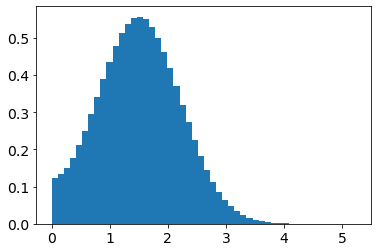

In [31]:
rng = default_rng()
r   = 0.7
rx  = 0.9
mean= np.asarray([1.5,1.5])
cov = np.asarray([[ 1-r**2, rx-r**2],\
                  [rx-r**2,  1-r**2]])
print(cov)
vals = rng.multivariate_normal(mean,cov,10000000)
R1_abs=np.abs(vals[:,0])
R2_abs=np.abs(vals[:,1])

plt.hist(R1_abs,50,density=True)
plt.show()

In [32]:
def f_c(R1, R2, mean, cov):
    pp = multivariate_normal.pdf(np.array([ R1, R2]), mean=mean, cov=cov, allow_singular=False)
    pm = multivariate_normal.pdf(np.array([ R1,-R2]), mean=mean, cov=cov, allow_singular=False)
    mp = multivariate_normal.pdf(np.array([-R1, R2]), mean=mean, cov=cov, allow_singular=False)
    mm = multivariate_normal.pdf(np.array([-R1,-R2]), mean=mean, cov=cov, allow_singular=False)
    return pp+pm+mp+mm

def f_c_all(R1, R2, mean, cov):
    pp = multivariate_normal.pdf(np.concatenate(( R1, R2), axis=1), mean=mean, cov=cov, allow_singular=False)
    pm = multivariate_normal.pdf(np.concatenate(( R1,-R2), axis=1), mean=mean, cov=cov, allow_singular=False)
    mp = multivariate_normal.pdf(np.concatenate((-R1, R2), axis=1), mean=mean, cov=cov, allow_singular=False)
    mm = multivariate_normal.pdf(np.concatenate((-R1,-R2), axis=1), mean=mean, cov=cov, allow_singular=False)
    return pp+pm+mp+mm

In [33]:
nx, ny = (100,100)
xy_max = 4
xbase  = np.linspace(0.001, xy_max, nx)
ybase  = np.linspace(0.001, xy_max, ny)
xx,yy  = np.meshgrid(xbase,ybase)
y_in   = np.transpose(np.array([xx.flatten(), yy.flatten()]))
print(y_in.shape)

t1_start = perf_counter()  
result = f_c_all(y_in[:,0].reshape(-1,1), y_in[:,1].reshape(-1,1), mean, cov)
result = result.reshape(nx,ny)
print(result.shape)
t1_end = perf_counter()  

print(f"Elapsed time: {t1_end-t1_start:.3} s")
print(f"Integrated probability density: {np.sum(result[:])*((xy_max/nx)*(xy_max/ny)):.3}")

(10000, 2)
(100, 100)
Elapsed time: 0.00587 s
Integrated probability density: 0.985


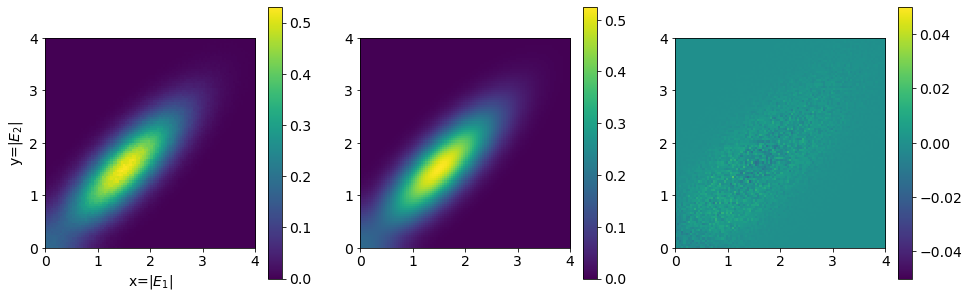

In [34]:
xedges = np.linspace(0,4,101)
yedges = np.linspace(0,4,101)
Hx_emp, xedges, yedges = np.histogram2d(R1_abs, R2_abs, bins=(xedges, yedges),density=True)

plt.figure(figsize=(16,5))                         
plt.subplot(1,3,1)        
plt.imshow(Hx_emp, interpolation='none', extent=[0,4,0,4],origin='lower')

plt.xlabel(r"x=$|E_1|$"); plt.ylabel(r"y=$|E_2|$")
plt.colorbar(); 

plt.subplot(1,3,2)        
plt.imshow(result, interpolation='none', extent=[0,4,0,4],origin='lower')
plt.colorbar()
                         
plt.subplot(1,3,3)
plt.imshow(Hx_emp-result, interpolation='none', extent=[0,4,0,4],origin='lower',vmin=-0.05,vmax=0.05)
plt.colorbar(); plt.show()

## Posterior bivariate phase distributions

In the case where we want infer $E_{on}$ and $E_{off}$ the joint distribution of $\phi_{on}$ and $\phi_{off}$ conditional on $|E_{on}|$ and $|E_{off}|$ seem to always be unimodal with positive correlation between $\phi_{on}$ and $\phi_{off}$.

In [35]:
rng = default_rng()
r   = 0.8
rx  = 0.95
mean= np.asarray([2,2,0,0])
cov = 0.5*\
    np.asarray([[ 1-r**2, rx-r**2,0,      0      ],\
                [rx-r**2,  1-r**2,0,      0      ],\
                [0,        0,     1-r**2, rx-r**2],\
                [0,        0,    rx-r**2,  1-r**2]])
vals = rng.multivariate_normal(mean,cov,10000000)
phi1= np.angle(vals[:,0] + 1j*vals[:,2])
phi2= np.angle(vals[:,1] + 1j*vals[:,3])
R1_sq=vals[:,0]**2 + vals[:,2]**2
R2_sq=vals[:,1]**2 + vals[:,3]**2

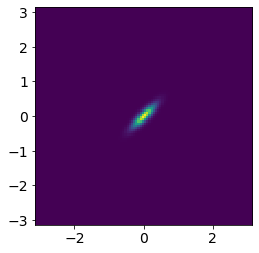

In [36]:
xedges = np.linspace(-np.pi,np.pi,101)
yedges = np.linspace(-np.pi,np.pi,101)
Hx_emp, xedges, yedges = np.histogram2d(phi1, phi2, bins=(xedges, yedges),density=True)

plt.imshow(Hx_emp, interpolation='none', extent=[-3.142,3.142,-3.142,3.142],origin='lower')
plt.show()

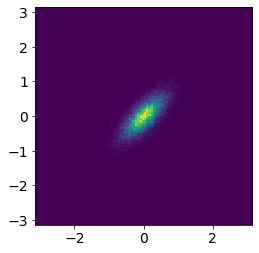

In [37]:
sig=0.5
E1 = 0.5
E2 = 3
phi1_sub = phi1[((R1_sq-E1**2) < sig) & ((R2_sq-E2**2) < sig)]
phi2_sub = phi2[((R1_sq-E1**2) < sig) & ((R2_sq-E2**2) < sig)]

Hx_emp, xedges, yedges = np.histogram2d(phi1_sub, phi2_sub, bins=(xedges, yedges),density=True)

plt.imshow(Hx_emp, interpolation='none', extent=[-3.142,3.142,-3.142,3.142],origin='lower')
plt.show()

### Coppens Model

Considering $E^{gs}$ and $E^{es}$ instead, we'll use the following generative model. Let $(E_{gs,x},E_{es,x},E_{3,x},E_{gs,y},E_{es,y},E_{3,y})$ have the following joint distribution:

$$
(E_{gs,x},E_{es,x},E_{3,x},E_{gs,y},E_{es,y},E_{3,y})\sim N\left(\mu=0,C\right)
$$

with covariance matrix

$$
C = \frac{1}{2}
\begin{bmatrix}
1      & r_x    & r_{gs} & 0      & 0      & 0  \\
r_x    & 1      & r_{es} & 0      & 0      & 0  \\
r_{gs} & r_{es} & 1      & 0      & 0      & 0  \\
0      & 0      & 0      & 1      & r_x    & r_{gs}  \\
0      & 0      & 0      & r_x    & 1      & r_{es}  \\
0      & 0      & 0      & r_{gs} & r_{es} & 1  
\end{bmatrix}
$$

For $r_x=r_{es} \times r_{gs}$, this assumes that there are no correlations between $E_{gs}$ and $E_{es}$ beyond their joint correlation with the reference data set. In this case, the conditional distribution of $E_{gs}$ and $E_{es}$ given $E_3$ is:

$$
P\left(E_{gs,x},E_{es,x},E_{3,x},E_{gs,y}|E_{es,y},E_{3,y}\right)\sim N\left(\mu=(r_{gs},r_{es})^T E_3,C_{gs,es|3}\right)
$$

with 

$$
C_{gs,es|3} = \frac{1}{2}
\begin{bmatrix}
1-r_{gs}^2          & r_x - r_{gs}r_{es} & 0      & 0  \\
r_x - r_{gs}r_{es}  & 1   - r_{es}^2     & 0      & 0  \\
0                   & 0                  & 1-r_{gs}^2          & r_x - r_{gs}r_{es}  \\
0                   & 0                  & r_x - r_{gs}r_{es}  & 1   - r_{es}^2    
\end{bmatrix}
$$

where we assumed, without loss of generality, that the phase of $E_3$ is zero (so all phases below are really phase differences relative to the phase of $E_3$!).

The next step is to postulate that in our measurements, $E_{off}=E_{gs}$ and $E_{on} = (1-p)E_{gs}+p E_{es}$.

In [83]:
p    = 0.3
r_es = 0.0
r_gs = 0.0
rx   = np.max([0.95, r_es * r_gs])
print(rx)
E3   = 1

0.95


### Simulated data

In [84]:
rng = default_rng()

mean= np.asarray([r_gs*E3,r_es*E3,0,0])
cov = 0.5*\
    np.asarray([[ 1-r_gs*r_gs, rx -r_es*r_gs, 0,            0      ],\
                [rx-r_es*r_gs,  1 -r_es*r_es,   0,            0      ],\
                [0,           0,              1 -r_gs*r_gs, rx-r_gs*r_es],\
                [0,           0,              rx-r_gs*r_es,  1-r_es*r_es]])
print(cov)
lam,V = np.linalg.eig(cov)
print(lam)
vals   = rng.multivariate_normal(mean,cov,10000000)
E_gs   = vals[:,0] + 1j * vals[:,2]
E_es   = vals[:,1] + 1j * vals[:,3]
E_off  = E_gs
E_on   = (1-p)*E_gs + p*E_es
phi_on = np.angle(E_off)
phi_off= np.angle(E_on)
E_off_abs = np.abs(E_off)
E_on_abs  = np.abs(E_on)

[[0.5   0.475 0.    0.   ]
 [0.475 0.5   0.    0.   ]
 [0.    0.    0.5   0.475]
 [0.    0.    0.475 0.5  ]]
[0.975 0.025 0.975 0.025]


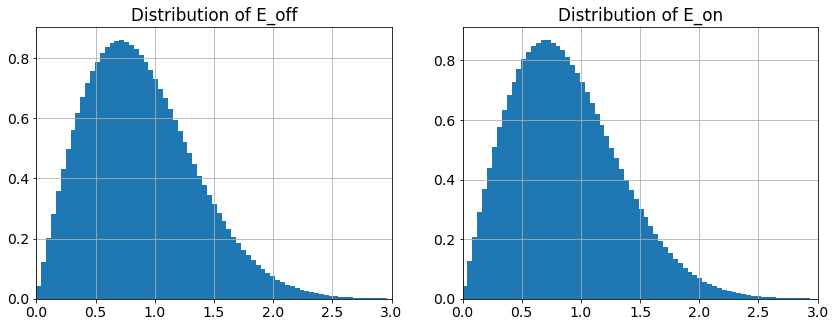

0.9894602568409652


In [85]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(E_off_abs,100,density=True); plt.xlim((0,3))
plt.grid(); xl = plt.xlim()
plt.title("Distribution of E_off")
# print(np.mean(E_off_abs))

plt.subplot(1,2,2)
plt.hist(E_on_abs,100,density=True); plt.xlim((0,3))
plt.title("Distribution of E_on")
plt.xlim(xl); plt.grid(); plt.show()
print(np.mean(E_on_abs)/np.mean(E_off_abs))


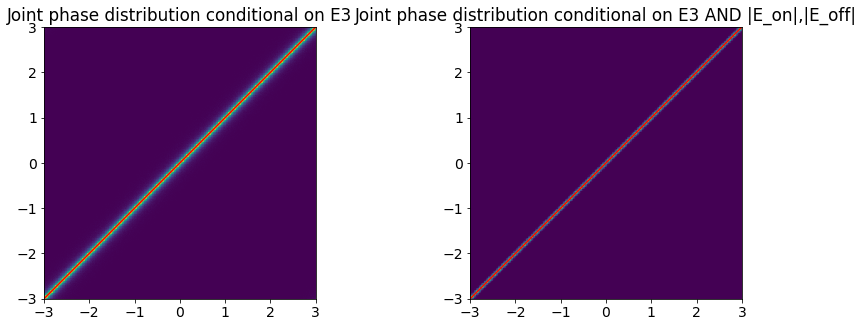

In [86]:
xedges = np.linspace(-np.pi,np.pi,401)
yedges = np.linspace(-np.pi,np.pi,401)
Hx_emp, xedges, yedges = np.histogram2d(phi_on, phi_off, bins=(xedges, yedges),density=True)

lims = 3*np.array([-1,1])
diag = np.pi*np.array([-1.,1.])

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.imshow(Hx_emp, interpolation='none', extent=[-3.142,3.142,-3.142,3.142],origin='lower')
plt.plot(diag,diag,'r-')
plt.xlim(lims); plt.ylim(lims); plt.title("Joint phase distribution conditional on E3")

sig= 0.3
E1 = 2
E2 = 2 # try 1.3 or 2.5 for extremes for (p=0.3, r_es=0.9, r_gs=0.95, rx=r_es*r_gs, E3=2)
selection = (np.abs(E_off_abs-E1) < sig) & (np.abs(E_on_abs-E2) < sig)
phi1_sub = phi_on[ selection ]
phi2_sub = phi_off[selection]

plt.subplot(1,2,2)
Hx_emp, xedges, yedges = np.histogram2d(phi1_sub, phi2_sub, bins=(xedges, yedges),density=True)
plt.imshow(Hx_emp, interpolation='none', extent=[-3.142,3.142,-3.142,3.142],origin='lower')
plt.plot(diag,diag,'r-')
plt.xlim(lims); plt.ylim(lims); plt.title("Joint phase distribution conditional on E3 AND |E_on|,|E_off|")
plt.show()

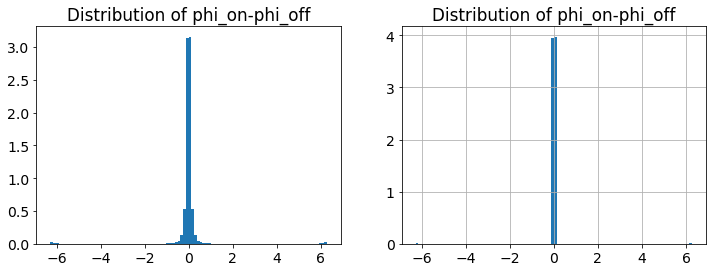

0.00018988879153529904


In [87]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(phi_on-phi_off,100,density=True); 
plt.title("Distribution of phi_on-phi_off")

plt.subplot(1,2,2)
plt.hist(phi1_sub-phi2_sub,100,density=True); 
plt.title("Distribution of phi_on-phi_off")
plt.grid()

plt.show()
print(np.mean(phi1_sub-phi2_sub))

For any realistic scenario above, I always end up with positively correlated phases, a single mode, and mean 0.

### Mardia's bivariate Von-Mises models

In [ ]:
from scipy.special import iv, i0, jv, j0
from scipy.special import binom as choose

def C_cos_pos_inv(k1,k2,k3):
    '''
    Normalizing constant for the cosine positive BVM from Mardia, 2010, table 2.
    In practice the sum converges with 10 terms or fewer. One can verify that by
    replacing np.sum by np.cumsum.
    '''
    kmax=100
    second_term = [iv(k,k1)*iv(k,k2)*iv(k,k3) for k in range(1,kmax+1,1)]
    result = (2*np.pi)**2 * (i0(k1)*i0(k2)*i0(k3) + 2*np.sum(second_term))
    return result

def C_sin_inv(k1,k2,lam):
    '''
    Normalizing constant for the sine BVM from Mardia, 2010, table 2.
    In practice the sum converges with 10 terms or fewer. One can verify that by
    replacing np.sum by np.cumsum.
    '''
    kmax=20
    terms  = [choose(2*k,k) * ((lam**2)/(4*k1*k2))**k * iv(k,k1)*iv(k,k2) for k in range(0,kmax+1,1)]
    result = (2*np.pi)**2 * np.sum(terms)
    return result

def cos_pos_BVM(angles,k1,k2,k3,mu=0,nu=0):
    '''
    Cosine model with positive interactions from Mardia, 2010.
    We set both means to zero by default
    '''
    theta = angles[:,0]
    phi   = angles[:,1]
    L     = angles.shape[0]
#     C_inv = C_cos_pos_inv(k1,k2,k3)
#     C_inv = np.broadcast_to(C_inv,(L,1)) # I kept this here for when one uses np.cumsum in C_cos_pos_inv

    num = np.exp(k1*np.cos(theta-mu)+k2*np.cos(phi-nu)-k3*np.cos(theta-mu-phi+nu))
#     num = num.reshape(-1,1) # this requires an np.repeat when working with the cumulative sum
#     return num/C_inv
    return num

def sin_BVM(angles, k1,k2,lam,mu=0,nu=0):
    '''
    Cosine model with positive interactions from Mardia, 2010.
    We set both means to zero by default
    '''
    theta = angles[:,0]
    phi   = angles[:,1]
    L     = angles.shape[0]

    C_inv = C_sin_inv(k1,k2,lam)
    num = np.exp(k1*np.cos(theta-mu)+k2*np.cos(phi-nu)+lam*np.sin(theta-mu)*np.sin(phi-nu))
    return num/C_inv

### Cosine (+) BVM

For the cosine BVM, it is unimodal if $k_3 < \frac{k_1 k_2}{k_1 + k_2}$ and bimodal if the opposite holds. All provided $k_1 > k_3 > 0$ and $k_2 > k_3 > 0$. See Theorem 2 in https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1541-0420.2006.00682.x. For high concentration, the approximate correlation coefficient is 

$$
\rho_c = \frac{-k_3}{\sqrt{(k_1-k_3)(k_2-k_3)}}
$$

per eq. 3.3.2 of the same paper.

In [ ]:
# pos correlation cos BVM
k1,k2,k3 = 18,-5,-50

A               = np.array([[-k3,0],[0,-k3]])
Sig_inv_cos_pos = np.array([[A[0,0]+k1,-A[1,1]],[-A[1,1],A[0,0]+k2]])
Sig_cos_pos     = np.linalg.inv(Sig_inv_cos_pos)
print(Sig_cos_pos)
print(Sig_cos_pos[0,1]/np.sqrt(Sig_cos_pos[0,0]*Sig_cos_pos[1,1]))

print(f"exp sigmas at high conc.: {np.sqrt(Sig_cos_pos[0,0]):.4} and {np.sqrt(Sig_cos_pos[1,1]):.4}")
print(f"exp value of rho at high conc.(1): {Sig_cos_pos[0,1]/np.sqrt(Sig_cos_pos[0,0]*Sig_cos_pos[1,1]):.4}")
print(f"exp value of rho at high conc.(2): {-k3/np.sqrt((k1-k3)*(k2-k3)):.4}")

### Sine BVM
For the sine BVM, Singh et al., Biometrika, 2002 determine that for tight distributions, the sine BVM approximates a bivariate normal with 

$$
\sigma_1^2=\frac{k_2}{k_1 k_2 -\lambda^2}, 
\sigma_2^2=\frac{k_1}{k_1 k_2 -\lambda^2},
\rho = \frac{\lambda}{\sqrt{k_1 k_2}}
$$

provided $\lambda^2<k_1 k_2$. This suggests initial point estimates of $k_1,k_2,\lambda$ as:

$$
\hat{k}_1 = \frac{1}{\sigma_1^2(1-\rho^2)}; 
\hat{k}_2 = \frac{1}{\sigma_2^2(1-\rho^2)};
\hat{\lambda}=\sqrt{\rho^2 \hat{k}_1 \hat{k}_2}
$$

In [ ]:
# sine BVM
rho = 0.955 #np.corrcoef(phi_off, phi_on)[0,1]
print(rho)
k1 = 1/(0.18*np.var(phi_off)*rho**2)
k2 = 1/(0.15*np.var(phi_on )*rho**2)
lam = np.sqrt(rho**2 * k1 * k2)
A       = np.array([[0,0],[0,lam]])
Sig_inv_cos_pos = np.array([[A[0,0]+k1,-A[1,1]],[-A[1,1],A[0,0]+k2]])
Sig_cos_pos     = np.linalg.inv(Sig_inv_cos_pos)
print(Sig_cos_pos)
print(Sig_cos_pos[0,1]/np.sqrt(Sig_cos_pos[0,0]*Sig_cos_pos[1,1]))

var1_exp = k2/(k1*k2-lam**2)
var2_exp = k1/(k1*k2-lam**2)
rho_exp  = lam/np.sqrt(k1*k2)
print(f"var1 (observed): {np.var(phi_off):.4}, var2 (observed): {np.var(phi_on):.4}")
print(f"var1 (expected): {var1_exp:.4}, var2 (expected): {var2_exp:.4}, rho (exp): {rho_exp:.3}")

### Bivariate torus folded normal (BTFN) & Bivariate torus folded Student _t_ (BVTFST!)

In [ ]:
def BTFN(angles,cov,mu=0,nu=0):
    '''
    Cosine model with positive interactions from Mardia, 2010.
    We set both means to zero by default
    '''
    kmax = np.ceil(3*np.sqrt(cov[0,0])/(2*np.pi)).astype('int')
    lmax = np.ceil(3*np.sqrt(cov[1,1])/(2*np.pi)).astype('int')
    L = angles.shape[0]
    mean = np.array([mu,nu])
    tmp=np.array([multivariate_normal.pdf(angles+np.repeat(np.array([k*2*np.pi,l*2*np.pi]).reshape(1,-1),L,axis=0),\
                                          mean, cov)\
                  for k in range(-kmax,kmax+1) for l in range(-lmax,lmax+1)])
    return np.sum(tmp,axis=0)

def BVTFST(angles,cov,mu=0,nu=0,df=2):
    '''
    Cosine model with positive interactions from Mardia, 2010.
    We set both means to zero by default
    '''
    kmax = np.ceil(4*np.sqrt(cov[0,0])/(2*np.pi)).astype('int')
    lmax = np.ceil(4*np.sqrt(cov[1,1])/(2*np.pi)).astype('int')
    L = angles.shape[0]
    mean = np.array([mu,nu])
    tmp=np.array([multivariate_t.pdf(angles+np.repeat(np.array([k*2*np.pi,l*2*np.pi]).reshape(1,-1),L,axis=0),\
                                          mean, cov,df)\
                  for k in range(-kmax,kmax+1) for l in range(-lmax,lmax+1)])
    return np.sum(tmp,axis=0)

### Evaluation and comparison to simulated data

In [ ]:
nx, ny = (1000,1000)
xbase  = np.linspace(-np.pi, np.pi, nx)
ybase  = np.linspace(-np.pi, np.pi, ny)
dx     = (xbase[-1]-xbase[0])/nx
dy     = (ybase[-1]-ybase[0])/ny
xx,yy  = np.meshgrid(xbase,ybase)
y_in   = np.transpose(np.array([xx.flatten(), yy.flatten()]))
print(y_in.shape)

t1_start = perf_counter()  
# result = sin_BVM(y_in,k1=k1,k2=k2,lam=lam,mu=0,nu=0)
# result = cos_pos_BVM(y_in,k1=k1,k2=k2,k3=k3,mu=0,nu=0)
# result = result/(dx*dy*np.sum(result[:]))
tmp=np.cov(phi_off,phi_on)
tmp[1,1]= 0.85*tmp[1,1]
tmp[0,1]=0.932*np.sqrt(tmp[0,0]*tmp[1,1])
tmp[1,0]=0.932*np.sqrt(tmp[0,0]*tmp[1,1])
result = BVTFST(y_in,tmp,df=8)
t1_end = perf_counter() 
print(f"time elapsed: {t1_end-t1_start:.4} s.")

In [ ]:
xedges = np.linspace(-np.pi,np.pi,nx+1)
yedges = np.linspace(-np.pi,np.pi,ny+1)
Hx_emp, xedges, yedges = np.histogram2d(phi_on, phi_off, bins=(xedges, yedges),density=True)

lims = 3.14*np.array([-1,1])/2
diag = np.pi*np.array([-1.,1.])

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.imshow(Hx_emp, interpolation='none', extent=[-3.142,3.142,-3.142,3.142],origin='lower')
plt.plot(diag,diag,'r-')
plt.xlim(lims); plt.ylim(lims); plt.title("Joint phase dist. | E3"); plt.xlabel(r"$\phi_{off}$"); plt.ylabel(r"$\phi_{on}$")
plt.colorbar(); 

plt.subplot(1,3,2)        
plt.imshow(result.reshape(nx,ny), interpolation='none', extent=[-np.pi,np.pi,-np.pi,np.pi],origin='lower')
plt.plot(diag,diag,'r-')
plt.xlim(lims); plt.ylim(lims); plt.colorbar(); plt.xlabel(r"$\phi_{off}$"); plt.ylabel(r"$\phi_{on}$")
                         
plt.subplot(1,3,3)
plt.imshow(Hx_emp-result.reshape(nx,ny), interpolation='none',extent=[-np.pi,np.pi,-np.pi,np.pi],origin='lower')
plt.plot(diag,diag,'r-')
plt.colorbar(); plt.show()

print(np.sum((2*np.pi/nx)*(2*np.pi/ny) * result[:]))

For some parameter combinations, we see that the ON phases vary more widely than the OFF phases, resulting in a steeper-than-1 slope.

In [ ]:
rho=0.9
plt.figure(figsize=(8,6))

k_range  = [0.1,  0.2, 0.5, 1]#,  2,  4,  8]
kp_range = [0.11,  0.2, 0.45, 0.8] #,1.5,3.2,7]
# offset_range = np.array([k/30 for k in k_range])
print(offset_range)
for i in range(len(k_range)):
    k  = k_range[ i]
    kp = kp_range[i]
    offset = offset_range[i]
    cov = k*np.array([[1,rho],[rho,1]])
#     result = BVTFST(y_in,cov,mu=0,nu=0,df=8)
    result = BTFN(y_in,cov,mu=0,nu=0)
#     result = offset/(2*np.pi) + (1-offset)*result
    p = plt.plot(xbase, np.sum((2*np.pi/ny)*result.reshape(nx,ny),axis=1),label=f"k={k}")
    plt.plot(xbase, vonmises.pdf(xbase,kappa=1/kp,loc=0),color=p[0].get_color(),linestyle='dashed')
yl=plt.ylim()
plt.legend(); plt.ylabel("density"); plt.xlabel("phase"); plt.title(r"marginal 2D BVTFN; dashed: Von Mises")
plt.ylim((0,1.02*yl[1]))
plt.yscale("log"); plt.ylim([0.0005,2])
plt.show()

## Obsolete but didn't want to discard

and will use that 
$Cov\left( E_{1x}^2, E_{2x}^2|E_3\right)=\left< E_{1x}^2 \cdot E_{2x}^2|E_3\right>-\left< E_{1x}^2|E_3\right>\left< E_{2x}^2|E_3\right>$, 

and going by https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Higher_moments,

$$\left< E_{1x}^2 \cdot E_{2x}^2|E_3\right>=\left<\left(E_{1x}-\mu_{1x|3}+\mu_{1x|3}\right)^2
                                                  \left(E_{2x}-\mu_{2x|3}+\mu_{2x|3}\right)^2
                                           \right>=\\
                                           \left<
                                                  \left(E_{1x}-\mu_{1x|3}\right)^2\left(E_{2x}-\mu_{2x|3}\right)^2
                                           \right>
                                           +\mu_{1x|3}^2\left<\left(E_{2x}-\mu_{2x|3}\right)^2\right>
                                           +\mu_{2x|3}^2\left<\left(E_{1x}-\mu_{1x|3}\right)^2\right>
                                           + \mu_{1x|3}^2 \mu_{2x|3}^2\\
                                           +4\mu_{1x|3} \mu_{2x|3} \left<\left(E_{1x}-\mu_{1x|3}\right)
                                                                         \left(E_{2x}-\mu_{2x|3}\right)
                                                                   \right> + odd\space moments
                                           = \\
                                           Cov\left(E_{1x}^2,E_{2x}^2|E_3\right)
                                           +\mu_{1x|3}^2 Var \left(E_{2x}|E_3\right)
                                           +\mu_{2x|3}^2 Var \left(E_{1x}|E_3\right)
                                           + \mu_{1x|3}^2 \mu_{2x|3}^2
                                           +4\mu_{1x|3} \mu_{2x|3} Cov \left(E_{1x},E_{2x}|E_3\right)     
$$   